# Project: Tmdb Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In This Project, I will be working with the TMDB movies dataset which was gathered between the years 1960 to 2015. The Dataset is which contains a large number of public data on films such as the title of the movie, the genre of the film, the ratings of the movie, the duration of the movie, actors, directors, the year of release of the movie tagline and much more.<br>
The aim of this project is to analyze the dataset while looking at how popularity and runtime affect Profit.



### Research questions
<ul>
<li>What is the name of the most popular movie?</li>
<li>what are the names of the movies with the highest profit?</li>
<li>Which Genre was most used from 1960 to 2015?</li>
<li>Who are the most used actors?</li>
<li>Does The Popularity Affect the Revenue Generated by The movie?</li>
<li>Who are the most used directors?</li>
<li>What is the number of movies released Yearly and total profit each Year?</li>
<li>Does a shorter runtime increase revenue?</li>
</ul>

In [1]:
# Loading Required Libraries
import numpy as np
import pandas as pd
pd.options.display.max_columns = 22 
pd.options.display.float_format = '{:.1f}'.format 
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,6)

<a id='wrangling'></a>
## Data Wrangling
### Loading dataset

In [2]:
TMDB = pd.read_csv("tmdb-movies.csv") 

### General Properties

__Checking The first 3 instances in the data.__

In [3]:
TMDB.head(3)  

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,33.0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1392445892.5
1,76341,tt1392190,28.4,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,348161292.5
2,262500,tt2908446,13.1,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,271619025.4


__Checking the summary of the data.__

In [4]:
TMDB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

`Observation:` The release_date field has the wrong datatype

__Checking the percentage of missing values in each field in the data__

In [5]:
TMDB.isnull().sum().sort_values(ascending=False) * 100/TMDB.shape[0]  

homepage               73.0
tagline                26.0
keywords               13.7
production_companies    9.5
cast                    0.7
director                0.4
genres                  0.2
imdb_id                 0.1
overview                0.0
budget_adj              0.0
release_year            0.0
vote_average            0.0
vote_count              0.0
release_date            0.0
id                      0.0
runtime                 0.0
original_title          0.0
revenue                 0.0
budget                  0.0
popularity              0.0
revenue_adj             0.0
dtype: float64

__Checking the descriptive statistics of the data__

In [6]:
TMDB.describe() 

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0,10866.0
mean,66064.2,0.6,14625701.1,39823319.8,102.1,217.4,6.0,2001.3,17551039.8,51364363.3
std,92130.1,1.0,30913213.8,117003486.6,31.4,575.6,0.9,12.8,34306155.7,144632485.0
min,5.0,0.0,0.0,0.0,0.0,10.0,1.5,1960.0,0.0,0.0
25%,10596.2,0.2,0.0,0.0,90.0,17.0,5.4,1995.0,0.0,0.0
50%,20669.0,0.4,0.0,0.0,99.0,38.0,6.0,2006.0,0.0,0.0
75%,75610.0,0.7,15000000.0,24000000.0,111.0,145.8,6.6,2011.0,20853251.1,33697095.7
max,417859.0,33.0,425000000.0,2781505847.0,900.0,9767.0,9.2,2015.0,425000000.0,2827123750.4


`Observation:` From the table above the minimum value for the budget, revenue, runtime, budget_adj, revenue_adj is zero. This is very weird<br><br>
__Checking the frequencies of zeroes in the Column of interest__

In [7]:
# The frequencies of zeroes in this field is frighteningly High.
TMDB['budget'].value_counts()  

0           5696
20000000     190
15000000     183
25000000     178
10000000     176
            ... 
40000          1
28             1
68             1
3500159        1
19000          1
Name: budget, Length: 557, dtype: int64

In [8]:
# The frequency of zeroes in this field is also frighteningly High.
TMDB['budget_adj'].value_counts()  

0.0            5696
10164004.3       17
21033371.7       17
20000000.0       16
4605455.3        15
               ... 
106208976.8       1
33478916.6        1
36653479.7        1
2225389.8         1
127642.3          1
Name: budget_adj, Length: 2614, dtype: int64

In [9]:
# There is quite a number of movies that did not make a dime, this is odd.
TMDB['revenue'].value_counts() 

0            6016
12000000       10
10000000        8
11000000        7
6000000         6
             ... 
93354918        1
76578641        1
171269535       1
215000000       1
33736689        1
Name: revenue, Length: 4702, dtype: int64

In [10]:
# something similar can be observed here
TMDB['revenue_adj'].value_counts()

0.0            6016
117753430.8       2
14389144.8        2
1000000.0         2
29106404.3        2
               ... 
20434028.4        1
6497290.7         1
81600740.3        1
118604185.3       1
80616176.3        1
Name: revenue_adj, Length: 4840, dtype: int64

In [11]:
#There are only 31 row where the runtime of the movie are equilavent to zero
TMDB.query('runtime == 0').count()[0]

31

__Checking the correlation of numerical columns in the data.__

In [12]:
TMDB.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.0,-0.0,-0.1,-0.1,-0.1,-0.0,-0.1,0.5,-0.2,-0.1
popularity,-0.0,1.0,0.5,0.7,0.1,0.8,0.2,0.1,0.5,0.6
budget,-0.1,0.5,1.0,0.7,0.2,0.6,0.1,0.1,1.0,0.6
revenue,-0.1,0.7,0.7,1.0,0.2,0.8,0.2,0.1,0.7,0.9
runtime,-0.1,0.1,0.2,0.2,1.0,0.2,0.2,-0.1,0.2,0.2
vote_count,-0.0,0.8,0.6,0.8,0.2,1.0,0.3,0.1,0.6,0.7
vote_average,-0.1,0.2,0.1,0.2,0.2,0.3,1.0,-0.1,0.1,0.2
release_year,0.5,0.1,0.1,0.1,-0.1,0.1,-0.1,1.0,0.0,-0.1
budget_adj,-0.2,0.5,1.0,0.7,0.2,0.6,0.1,0.0,1.0,0.6
revenue_adj,-0.1,0.6,0.6,0.9,0.2,0.7,0.2,-0.1,0.6,1.0


__Checking the Year when the Most Movies were released.__

In [13]:
TMDB['release_year'].mode()[0]

2014

__Checking the Number of Movies Released in That Year.__

In [14]:
sum(TMDB['release_year'] == 2014)

700

### Data Cleaning 

#### Fields to be dropped
- `Id:` It offers no meaningful insights, it is just a Unique identifer.<br>
- `Imdb_id:` It offers no meaningful insights, it is just a Unique identifer.<br>
- `Homepage:` It has too many missing values.<br>
- `Overview:` It offers no meaningful insights. It is not going to be useful except Natural Language Processing is done.<br>
- `Tagline:` It offers no meaningful insights. It is not going to be useful except Natural Language Processing is done.<br>
- `Keywords:` It offers no meaningful insights. It is not going to be useful except Natural Language Processing is done.

#### Fields to the Transformed
- `Release_date:` It has the object dtype and this will not be useful for analysis, it has to transformed into a Pandas datetime object.<br>
- `Budget:` It has too many zeros. This are null values since it's impossible for the budget of a movie to be zero dollars.<br>
- `Revenue:` It has too many zeros. This are null values since it's impossible for the revenue of a movie to be zero dollars.<br>
- `Budget_adj:` It has too many zeros. This are null values since it's impossible for the budget of a movie to be zero dollars.<br>
- `Revenue_adj:` It has too many zeros. This are null values since it's impossible for the revenue of a movie to be zero dollars.
- `Runtime:` It has a few zeros. This are null values since it's impossible for the runtime of a movie to be zero seconds.

#### Fields to the Created
- `Profit:` A field created from the difference between the Revenue and the Budget fields.

#### Additional Observations:
- `Cast:` it has the pipe operator inbetween actors.<br>
- `Genres:` it has the pipe operator inbetween genres.<br>
- `Production_companies:` it has the pipe operator inbetween companies.


__Permanent dropping of unnecessary fields in our data.__

In [15]:
TMDB.drop(columns=['id', 'imdb_id', 'homepage', 'overview', 'tagline', 'keywords'], inplace=True)

__Checking for duplicates.__

In [16]:
sum(TMDB.duplicated())

1

__Removing duplicates rows.__

In [17]:
TMDB.drop_duplicates(inplace=True)

__Transforming release_date from object to a datetime object.__

In [18]:
TMDB['release_date'] = pd.to_datetime(TMDB['release_date'])

__Replacing the zeros with with NAN values.__

In [19]:
TMDB['budget'] = TMDB['budget'].replace(0, np.nan)
TMDB['revenue'] = TMDB['revenue'].replace(0, np.nan)
TMDB['budget_adj'] = TMDB['budget_adj'].replace(0, np.nan)
TMDB['revenue_adj'] = TMDB['revenue_adj'].replace(0, np.nan)
TMDB['runtime'] = TMDB['runtime'].replace(0, np.nan)

__Dropping missing values.__

In [20]:
# dropping rows considering budget, revenue, budget_adj and revenue_adj.
TMDB.dropna(subset=['budget', 'revenue', 'budget_adj', 'revenue_adj', 'runtime'], inplace=True)  

In [21]:
# dropping rows with any missing values.
TMDB.dropna(inplace=True)

__Creating new fields to be used for further analysis.__

In [22]:
TMDB['profit'] = TMDB['revenue'] - TMDB['budget']
TMDB['profit_adj'] = TMDB['revenue_adj'] - TMDB['budget_adj']

__Resetting index.__

In [23]:
TMDB.reset_index(drop=True, inplace=True)

__Creating Custom Function to perform some string Formatting__

In [24]:
def list_of_items(data, column):
    '''
    data: 'DataFrame' = None,
    column: 'Column in dataframe'|'str',
    Returns pandas series
    '''
    return pd.Series([element for item in data[column] for element in item.split('|')])

__Creating list of actors, genres that will be used for plotting.__

In [25]:
list_of_actors = list_of_items(TMDB, 'cast')
List_of_genres = list_of_items(TMDB, 'genres')

__Creating Custom Function to Annotate Plots__

In [26]:
def Annotator(Data, x, y):
    '''
Returns Annotations.
Parameters:
    data: 'DataFrame' = None
    x: 'x-axis'|'str'
    y: 'y-axis'|'str'
    '''
    
    for i, label in enumerate(Data[y]):
        plt.text(Data[x].values[i], Data[y].values[i],
             round(label, 3), va='top',
                 fontweight='bold', ha='left',
                 color='white', fontsize=14,
                 rotation='vertical')

## Exploratory Data Analysis


__Checking the distribution of Budget field__

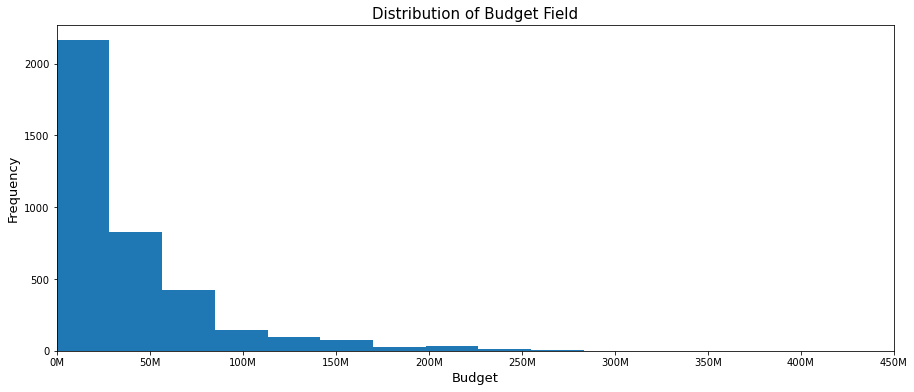

In [27]:
plt.hist(TMDB['budget'], bins=15)
plt.xlabel('Budget', fontdict=dict(size=13))
plt.ylabel('Frequency', fontdict=dict(size=13))
plt.title("Distribution of Budget Field", fontdict=dict(size=15))
x, xlabel= np.arange(0, 500000000, 50000000), (pd.Series(np.arange(0, 500, 50).astype(str)) + "M").values
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(x, xlabel)
plt.xlim(left=0);

Most movies have a budget of less than 100 million dollars.

__Checking the distribution of Revenue field__

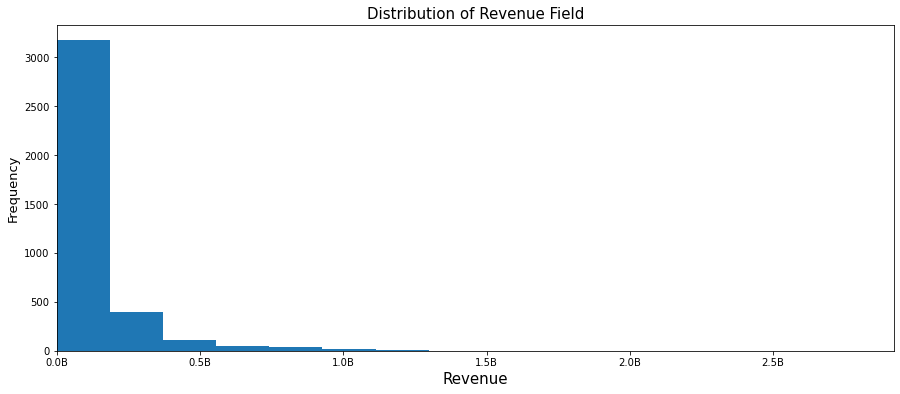

In [28]:
plt.hist(TMDB['revenue'], bins=15)
plt.xlabel('Revenue', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=13))
plt.title("Distribution of Revenue Field", fontdict=dict(size=15))
x, xlabel= np.arange(0, 3e9, 5e8), (pd.Series(np.arange(0, 3, 0.5)).astype(str) +"B").values
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.xticks(x, xlabel)
plt.xlim(left=0);

Most Movies have a Revenue of less than 500 million and the Revenue generated by most movies is alot greater than the budget.

__Checking the distribution of Profit field__

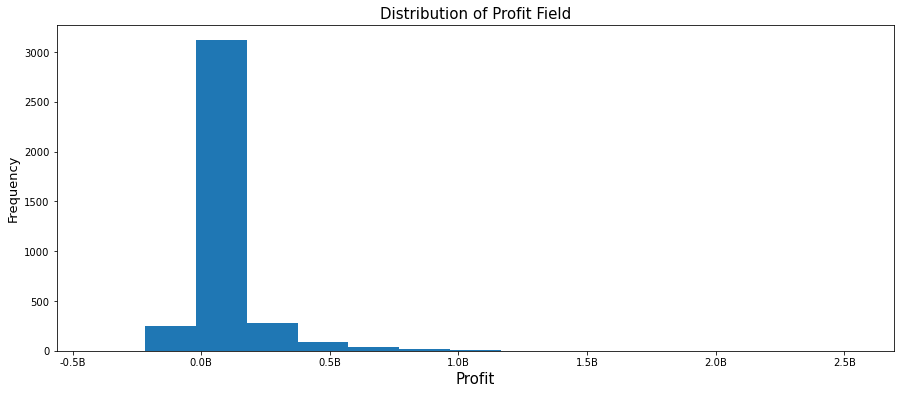

In [29]:
plt.hist(TMDB['profit'], bins=15)
plt.xlabel('Profit', fontdict=dict(size=15))
plt.ylabel('Frequency', fontdict=dict(size=13))
plt.title("Distribution of Profit Field", fontdict=dict(size=15))
x, xlabel= np.arange(-0.5e9, 3e9, 0.5e9), (pd.Series(np.arange(-0.5, 3, 0.5)).astype(str) +"B").values
plt.xticks(x, xlabel);

`Observation:` Most Movies have a profit of less than 500 million and some are even running at a loss.

## The Research Questions
### 1. What is the name of the most popular movie?

Getting the index for the top-ten most popular movies by popularity and assigning it to a variable.

In [30]:
Top_Ten_Index_Pop = TMDB['popularity'].sort_values(ascending=False)[:10].index

__List of top-ten most popular movies by popularity.__

In [31]:
pd.DataFrame(data=TMDB.iloc[Top_Ten_Index_Pop][['original_title', 'popularity', 'release_year', 'vote_average', 'profit', 'runtime']]).reset_index(drop=True)

,original_title,popularity,release_year,vote_average,profit,runtime
0,Jurassic World,33.0,2015,6.5,1363528810.0,124.0
1,Mad Max: Fury Road,28.4,2015,7.1,228436354.0,120.0
2,Interstellar,24.9,2014,8.0,456752480.0,169.0
3,Guardians of the Galaxy,14.3,2014,7.9,603312399.0,121.0
4,Insurgent,13.1,2015,6.3,185238201.0,119.0
5,Captain America: The Winter Soldier,13.0,2014,7.6,544766572.0,136.0
6,Star Wars,12.0,1977,7.9,764398007.0,121.0
7,John Wick,11.4,2014,7.0,58739897.0,101.0
8,Star Wars: The Force Awakens,11.2,2015,7.5,1868178225.0,136.0
9,The Hunger Games: Mockingjay - Part 1,10.7,2014,6.6,627100229.0,123.0


After searching the dataset, we can determine the most popular movies by the popularity.
The most popular Movie between 1960 and 2015 is **Jurassic World** released in 2015 with a public rating of 6.5/10 and a profit over 1.3 Trillion dollars. 

__Plotting a bar chart of the top-ten most popular movies by popularity__

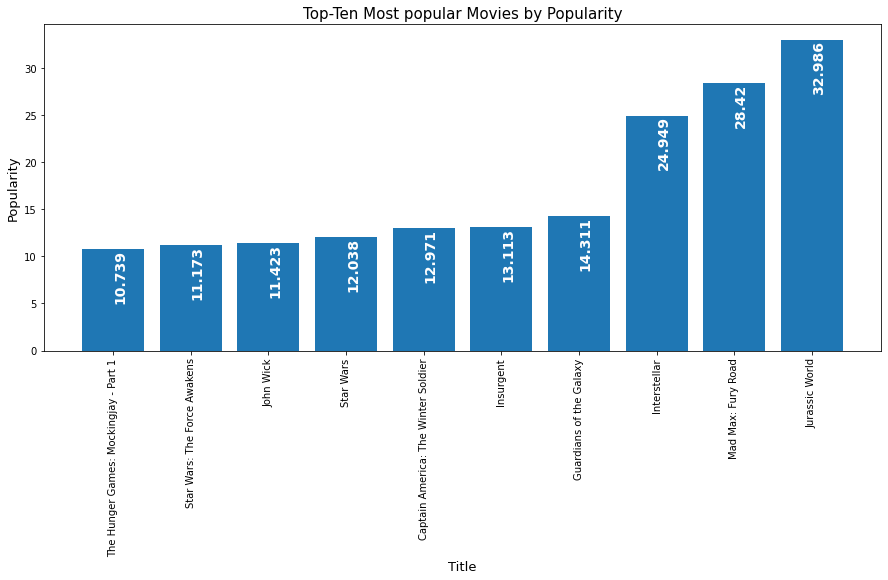

In [32]:
plt.bar(data=TMDB.iloc[Top_Ten_Index_Pop][::-1], x='original_title',height='popularity')
plt.xlabel('Title', fontdict=dict(size=13))
plt.ylabel('Popularity', fontdict=dict(size=13))
plt.xticks(rotation='vertical')
plt.title("Top-Ten Most popular Movies by Popularity", fontdict=dict(size=15))
Annotator(TMDB.iloc[Top_Ten_Index_Pop], 'original_title', 'popularity')

__Plotting a bar chart of the total profit of top-ten most popular movies.__

(0.0, 2790000000.0)

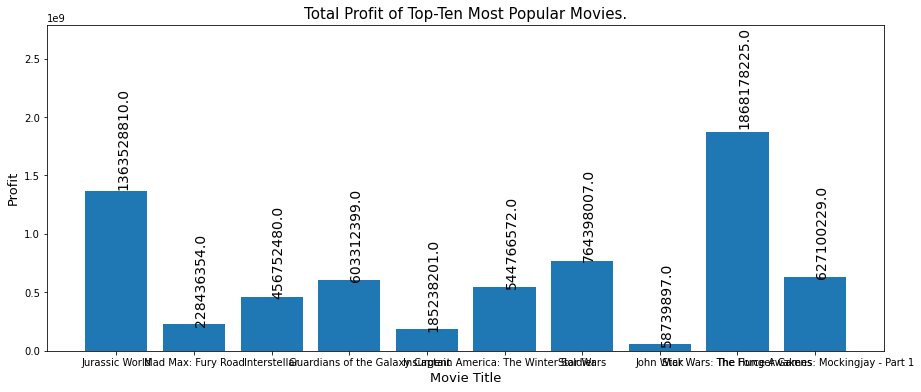

In [33]:
plt.bar(data=TMDB.iloc[Top_Ten_Index_Pop], x='original_title',height='profit')
plt.xlabel('Movie Title', fontdict=dict(size=13))
plt.ylabel('Profit', fontdict=dict(size=13))
# plt.xticks(rotation='vertical')
plt.title("Total Profit of Top-Ten Most Popular Movies.", fontdict=dict(size=15))
for i, label in enumerate(TMDB.iloc[Top_Ten_Index_Pop]['profit']):  #Labelling the Graph
    plt.text(TMDB.iloc[Top_Ten_Index_Pop]['original_title'].values[i],
             TMDB.iloc[Top_Ten_Index_Pop]['profit'].values[i] * 1.03,
             label, va='baseline',
             ha='left', color='black', fontsize=14, rotation=90)
plt.ylim(0, 2.79e9)

In the graph, we can determine that the fact that a movie is more popular does not make it more profitable, there are other facts to be considered to fully explain this.<br>
The most profitable movie in the top-ten most pupular is **Star Wars: The Force Awakens** which currently occupies the No. 9 Position in our table and has a profit of over 1.8 trillion dollars.

### 2. What are the names of the movies with the highest profit?

Getting the index for the top-ten movies with the highest profit and assigning it to a variable.

In [34]:
Top_Ten_Index_Profit = TMDB['profit'].sort_values(ascending=False)[:10].index

__List of movies with the top-ten highest profits from 1960 - 2015.__

In [35]:
pd.DataFrame(data=TMDB.iloc[Top_Ten_Index_Profit][['original_title', 'profit','release_year', 'vote_average', 'runtime']]).reset_index(drop=True)

,original_title,profit,release_year,vote_average,runtime
0,Avatar,2544505847.0,2009,7.1,162.0
1,Star Wars: The Force Awakens,1868178225.0,2015,7.5,136.0
2,Titanic,1645034188.0,1997,7.3,194.0
3,Jurassic World,1363528810.0,2015,6.5,124.0
4,Furious 7,1316249360.0,2015,7.3,137.0
5,The Avengers,1299557910.0,2012,7.3,143.0
6,Harry Potter and the Deathly Hallows: Part 2,1202817822.0,2011,7.7,130.0
7,Avengers: Age of Ultron,1125035767.0,2015,7.4,141.0
8,Frozen,1124219009.0,2013,7.5,102.0
9,The Net,1084279658.0,1995,5.6,114.0


After searching the dataset, we can determine the most expensive movie by budget. The most expensive movie between 1960 and 2015 is **Avatar** released in 2009 with a budget of 2.5 trillion Dollars and a public rating of 7.1/10.

__Plotting a bar chart for the movies with the top-ten highest profits.__

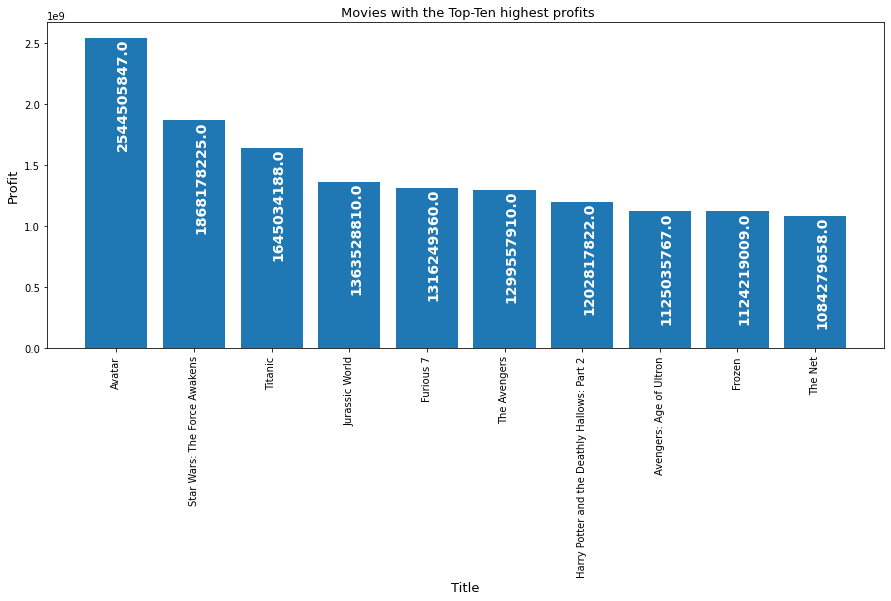

In [36]:
plt.bar(data=TMDB.iloc[Top_Ten_Index_Profit], x='original_title',height='profit')
plt.xlabel('Title', fontdict=dict(size=13))
plt.ylabel('Profit', fontdict=dict(size=13))
plt.title(" Movies with the Top-Ten highest profits", fontdict=dict(size=13))
plt.xticks(rotation='vertical')
Annotator(TMDB.iloc[Top_Ten_Index_Profit], 'original_title', 'profit')

### 3. Which Genre was most used from 1960 to 2015?

__List of top ten most used genres from 1960 to 2015.__

In [37]:
data = dict(Genre= List_of_genres.value_counts()[:10].index,Frequency=List_of_genres.value_counts()[:10].values)

Top_Ten_Genres = pd.DataFrame(data=data)
Top_Ten_Genres

,Genre,Frequency
0,Drama,1729
1,Comedy,1335
2,Thriller,1194
3,Action,1076
4,Adventure,743
5,Romance,658
6,Crime,649
7,Science Fiction,517
8,Horror,459
9,Family,417


We can determine the most used genre by checking the frequency table above. The most used genre between 1960 and 2015 is **Drama** and **Comedy** comes in second.


__Checking the average runtime for drama__

In [38]:
TMDB[TMDB['genres'] == 'Drama']['runtime'].mean()

119.38271604938272

__Plotting a bar chart with the top-ten most used genres and their frequencies.__

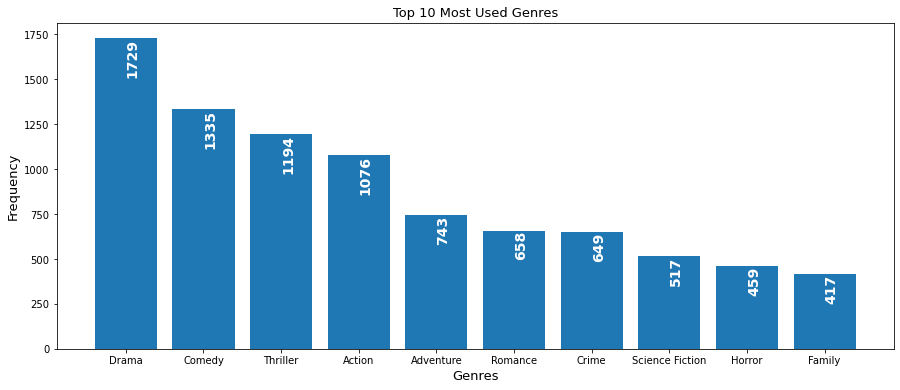

In [39]:
plt.bar(data=Top_Ten_Genres, x='Genre', height='Frequency',
                                        width=0.8)
plt.title('Top 10 Most Used Genres', fontdict=dict(size=13))
plt.xlabel('Genres', fontdict=dict(size=13))
plt.ylabel('Frequency', fontdict=dict(size=13))
Annotator(Top_Ten_Genres, 'Genre', 'Frequency')

### 4. Who are the most used actors

__List of top ten most used actors from 1960 to 2015.__

In [40]:
data = dict(Actors = list_of_actors.value_counts()[:10].index, Frequency = list_of_actors.value_counts()[:10].values)

Top_Ten_Actors = pd.DataFrame(data=data)
Top_Ten_Actors

,Actors,Frequency
0,Robert De Niro,52
1,Bruce Willis,46
2,Samuel L. Jackson,44
3,Nicolas Cage,43
4,Matt Damon,36
5,Johnny Depp,35
6,Harrison Ford,34
7,Tom Hanks,34
8,Morgan Freeman,34
9,Brad Pitt,34


After carefully examining the dataset, we can determine the most used actors by the numbers of movies they have starred in. The most used actor between 1960 and 2015 is **Robert De Niro** and having starred in 52 different movies.

__Plotting a bar chart with the top-ten most used actors and their frequencies.__

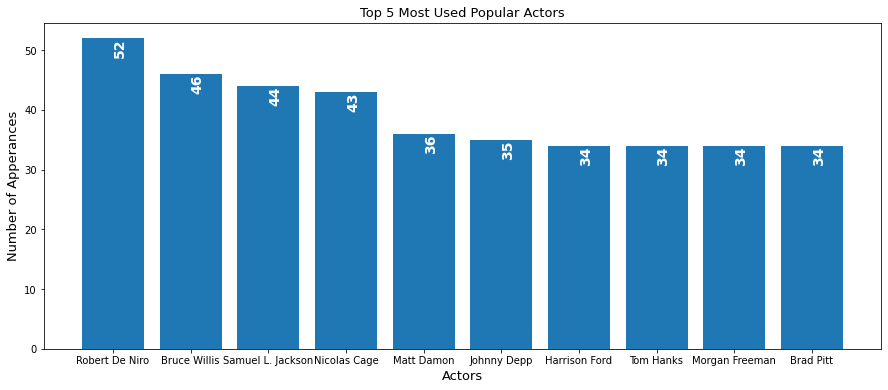

In [41]:
plt.bar(data=Top_Ten_Actors,
        x='Actors',
        height='Frequency',
        width=0.8)
plt.title('Top 5 Most Used Popular Actors', fontdict=dict(size=13))
plt.xlabel('Actors', fontdict=dict(size=13))
plt.ylabel('Number of Apperances', fontdict=dict(size=13))    
Annotator(Top_Ten_Actors, 'Actors', 'Frequency')

### 5. Does The Popularity Affect the Revenue Generated by The movie?

__Plotting a scatterplot of popularity and revenue.__

Text(0, 0.5, 'Revenue')

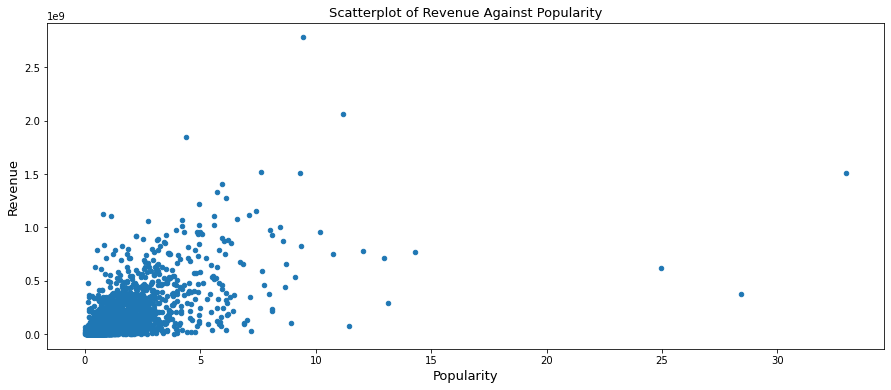

In [42]:
TMDB.plot(kind="scatter", 
         x='popularity',
         y='revenue')
plt.title('Scatterplot of Revenue Against Popularity', fontdict=dict(size=13))
plt.xlabel('Popularity', fontdict=dict(size=13))
plt.ylabel('Revenue', fontdict=dict(size=13))

In this graph, there is a moderate positive correlation between popularity and revenue, but this does not mean a very popular movie would be more profitable than a less popular one, to come to this conclusion more factors have to be considered.

### 6. Who are the most used directors?

List of top ten most used directors from 1960 to 2015.

In [43]:
data = dict(Directors = TMDB['director'].value_counts()[:10].index, Frequency = TMDB['director'].value_counts()[:10].values)

Top_Ten_Directors = pd.DataFrame(data=data)
Top_Ten_Directors

,Directors,Frequency
0,Steven Spielberg,27
1,Clint Eastwood,24
2,Ridley Scott,21
3,Woody Allen,18
4,Martin Scorsese,17
5,Steven Soderbergh,17
6,Tim Burton,16
7,Oliver Stone,15
8,Renny Harlin,15
9,Brian De Palma,15


After carefully examining the dataset, we can determine the most used director by the numbers of movies he/she have directed. The most used director between 1960 and 2015 is **Steven Spielberg** and having directed in 27 different movies.

__List of top ten most used genres from 1960 to 2015 by Steven Spielberg.__

In [44]:
Director_Genre_list = list_of_items(TMDB[TMDB['director'] == 'Steven Spielberg'], 'genres').value_counts()

data = dict(Genres = Director_Genre_list[:10].index, Frequency = Director_Genre_list[:10].values)

pd.DataFrame(data=data)

,Genres,Frequency
0,Drama,14
1,Adventure,12
2,Action,10
3,Science Fiction,7
4,Thriller,5
5,War,4
6,History,4
7,Family,3
8,Mystery,3
9,Comedy,3


`Note:` The director has directed more drama movies than any other genre.

__Checking the average runtime and profit for movies directed by Steven Spielberg.__

In [45]:
TMDB[TMDB['director'] == 'Steven Spielberg'][['runtime', 'profit']].mean()

runtime         135.4
profit    276557917.5
dtype: float64

__Plotting a bar chart with the top-ten most used directors and their frequencies.__

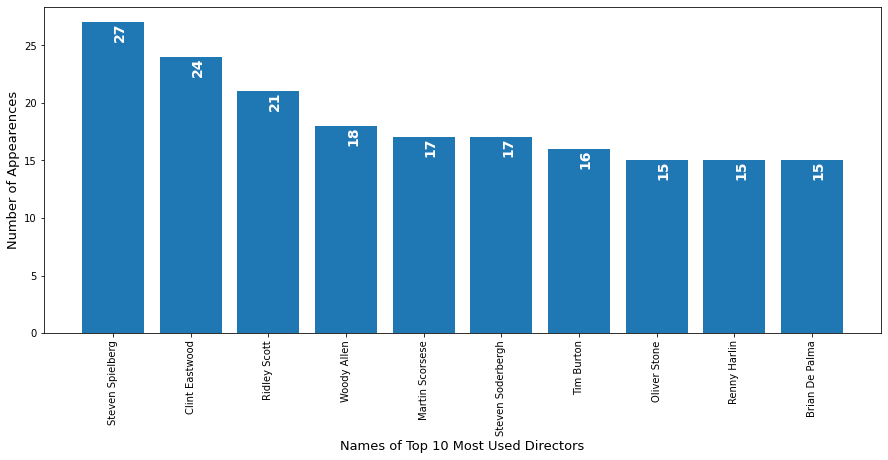

In [46]:
plt.bar(data=Top_Ten_Directors,        
        x='Directors', height='Frequency',
        width=0.8)
plt.xticks(rotation=90)
plt.xlabel('Names of Top 10 Most Used Directors', fontdict=dict(size=13))
plt.ylabel('Number of Appearences', fontdict=dict(size=13))
Annotator(Top_Ten_Directors, 'Directors', 'Frequency')

### 7. What is the number of movies released Yearly and total profit?

__Plotting a bar chart of number of movies released yearly against year.__

Text(0.5, 1.0, 'Number Of Movies Released Yearly')

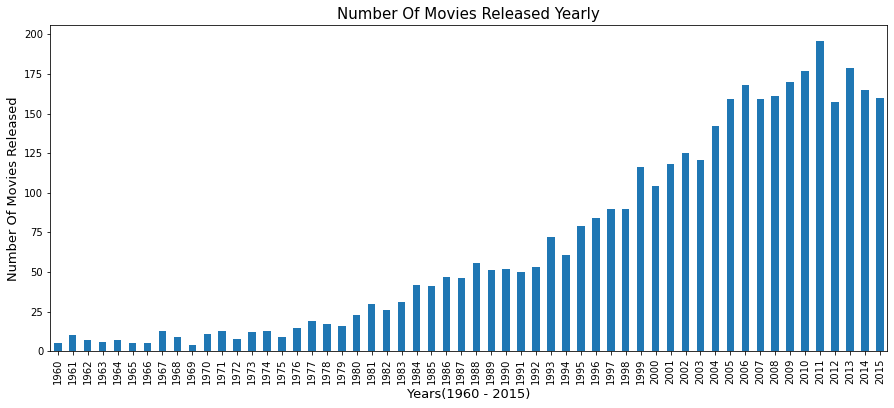

In [47]:
TMDB['release_year'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Years(1960 - 2015)', fontdict=dict(size=13))
plt.ylabel('Number Of Movies Released', fontdict=dict(size=13))
plt.title("Number Of Movies Released Yearly", fontdict=dict(size=15))

From the graph, the year in which the highest number of movies were released is **2011**.

__Plotting a bar chart of the average profit generated by the movies released yearly against year.__

Text(0.5, 1.0, 'Total Profit Generated The movies Released Yearly')

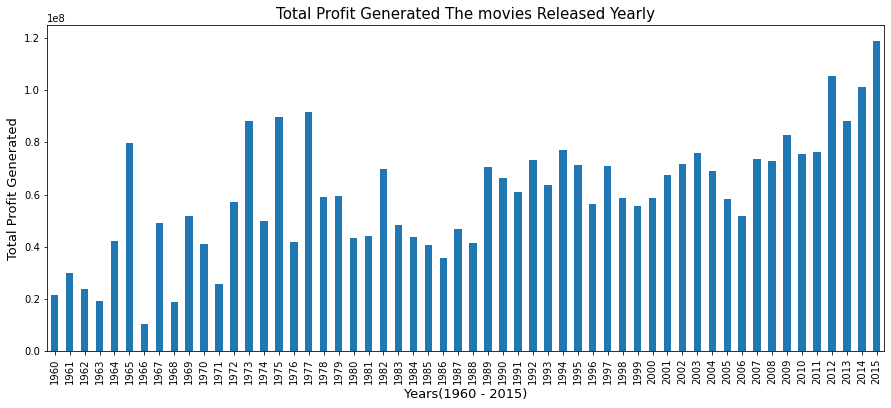

In [48]:
TMDB.groupby(by='release_year')['profit'].mean().plot(kind='bar')
plt.xlabel('Years(1960 - 2015)', fontdict=dict(size=13))
plt.ylabel('Total Profit Generated', fontdict=dict(size=13))
plt.title("Total Profit Generated The movies Released Yearly", fontdict=dict(size=15))

Although **2011** had the highest number of movies released, **2015** was a more profitable year for the movie industry

__Plotting a bar chart of the average runtime of the movies released yearly against year.__

Text(0.5, 1.0, 'Total Profit Generated The movies Released Yearly')

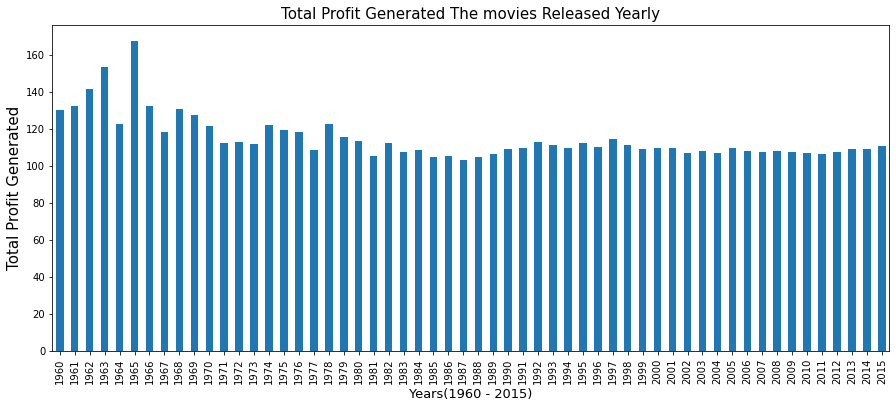

In [49]:
TMDB.groupby(by='release_year')['runtime'].mean().plot(kind='bar')
plt.xlabel('Years(1960 - 2015)', fontdict=dict(size=13))
plt.ylabel('Total Profit Generated', fontdict=dict(size=15))
plt.title("Total Profit Generated The movies Released Yearly", fontdict=dict(size=15))

From the graph above, there is a trend that can be observed from 1978 thus far, the average runtime of a movie is less than 120 minutes.

### 8. Does a shorter runtime increase revenue?

__Plotting a scatterplots of revenue against runtime.__

Text(0, 0.5, 'Revenue(Trilion)')

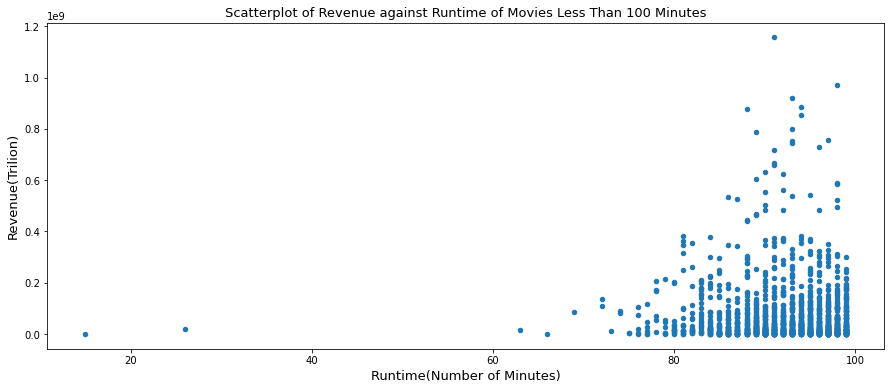

In [50]:
TMDB[TMDB['runtime'] < 100].plot(kind='scatter', x='runtime', y='revenue')
plt.title('Scatterplot of Revenue against Runtime of Movies Less Than 100 Minutes',
          fontdict=dict(size=13))
plt.xlabel('Runtime(Number of Minutes)', fontdict=dict(size=13))
plt.ylabel('Revenue(Trilion)', fontdict=dict(size=13))

Text(0, 0.5, 'Revenue(Trilion)')

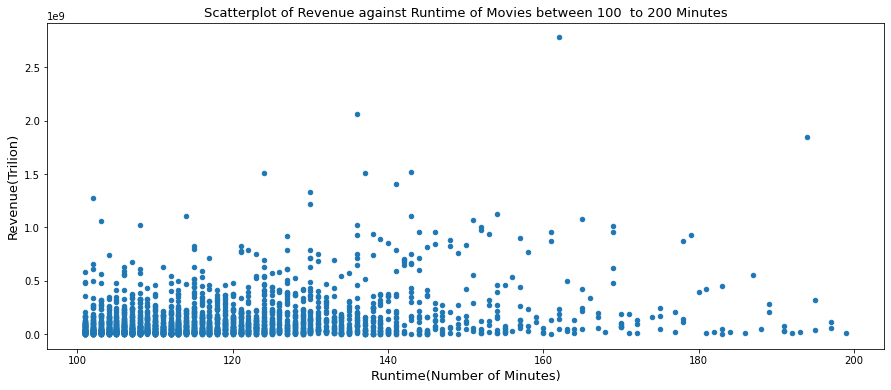

In [51]:
TMDB[(TMDB['runtime'] > 100) & (TMDB['runtime'] < 200)].plot(kind='scatter', x='runtime',
                                                             y='revenue')
plt.title('Scatterplot of Revenue against Runtime of Movies between 100  to 200 Minutes',
          fontdict=dict(size=13))
plt.xlabel('Runtime(Number of Minutes)', fontdict=dict(size=13))
plt.ylabel('Revenue(Trilion)', fontdict=dict(size=13))

Text(0, 0.5, 'Revenue(Trilion)')

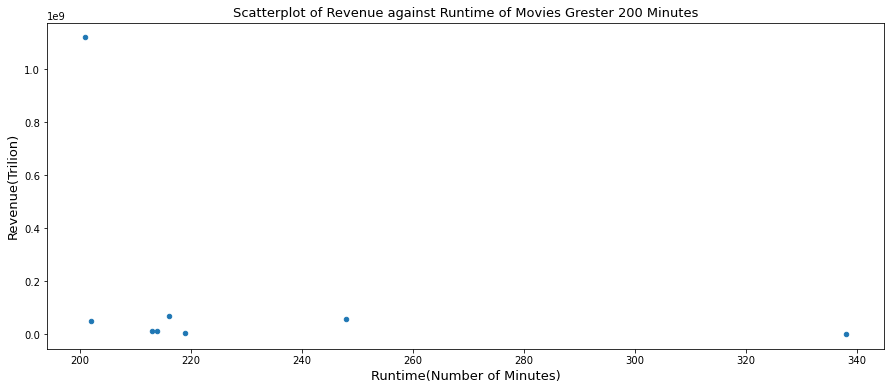

In [52]:
TMDB[TMDB['runtime'] > 200].plot(kind='scatter', x='runtime', y='revenue')
plt.title('Scatterplot of Revenue against Runtime of Movies Grester 200 Minutes',
          fontdict=dict(size=13))
plt.xlabel('Runtime(Number of Minutes)', fontdict=dict(size=13))
plt.ylabel('Revenue(Trilion)', fontdict=dict(size=13))

In the graphs above ,there is very slight positive correlation between runtime and revenue.<br>
Movies within the range of 60 minutes to 169 minutes tend have a higher revenue that movies that are out of this range(outliers). It is advisable for directors and production companies to strive to make a movie within the range of 60 minutes to 165 minutes to get a higher revenue.

<a id='conclusions'></a>
## Conclusions


This study through a large dataset has allowed me to come to a few conclusions, which are:
<ol>
<li>The Most Popular Movie between 1960 and 2015 is Jurassic World released in 2015 with a public rating of 6.5/10. It made a profit of over 1.3 Trillion dollars.</li>
<li> The fact that a movie is more popular than others does not make it more profitable.</li>
<li>Avatar, Star Wars: The Force Awakens and Titanic are the Movies with the highest Profits.</li>
<li>The most used genre is Drama, with an average runtime of 120 minutes</li>
<li>Robert De Niro, Bruce Willis and Samuel L. Jackson are the most used actors.</li>
<li> Steven Spielberg, Clint Eastwood and Ridley Scott are the most used directors.</li>
<li>The year in which the highest number of movies were released is 2011.</li>
<li>The longer the movie the lower the revenue, this is most likely because the audience tends to lose interest if the movie is too long. Most movies last between 60 minutes and 165 minutes.</li>
</ol>

## Limitations
The movie dataset does not contain some fields that could have potentially offered more insight to the relationship between popularity, runtime and profit, fields such as:
<ul> 
<li>Country in which the move was made</li>
<li>Language in which the movie was made</li>
</ul>